# Deep Learning (Fall 2024) - Homework 4

*Developed by Hongtau Wu & Suzanna Sia*

This notebook contains all starter code for Homework 4. Please read the written assignment carefully to ensure you include all necessary outputs in your final report. Your final submission (a single zip file) should include this notebook (.ipynb file) and a PDF of this notebook with all cell outputs.

## Problem 1a)

### Imports

In [1]:
## External Libararies
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
# Uploading the fileZ
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data Loading

In [2]:
## Spectify Path to Provided Data Here
DATA_PATH = '/content/drive/MyDrive/fall24_hw4_prob1_data.npy'

## Load Data and Check Dimensionality
data = np.load(DATA_PATH)
Y = data[:,2] # Extracting features
X = data[:,0:2] # Extracting labels

# Verfication of shape (60000, 3)
print(f"Shape of the data: {data.shape}")

## Polygon Boundaries
p = [[[500, 1000], [300, 800], [400, 600], [600, 600], [700, 800]],
     [[500, 600], [100, 400], [300, 200], [700, 200], [900, 400]]]
p = np.asarray(p)
p0 = p[0]
p1 = p[1]

Shape of the data: (60000, 3)


### Visualization Code

Do not touch any of the visualization code below.

In [4]:
## Helper code for visualisation (No Need to Touch)
def visualize_polygons(p0, p1):
    """

    """
    fig, ax = plt.subplots()
    patches = []
    polygon1 = Polygon(p0, True)
    polygon2 = Polygon(p1, True)
    patches.append(polygon1)
    patches.append(polygon2)
    p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)
    ax.add_collection(p)
    ax.autoscale_view()
    plt.show()

def visualize_datapoints(X, Y):
    """

    """
    assert(X.shape[0] == Y.shape[0])
    fig, ax = plt.subplots()
    npts = 60000
    col = np.where(Y[:npts]==1,'m','b')
    x1 = X[:npts][:,0]
    x2 = X[:npts][:,1]
    ax.scatter(x1, x2, s=0.5, c=col, zorder=1)
    plt.show()

<ipython-input-4-6958d58fb1fa>:8: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  polygon1 = Polygon(p0, True)
<ipython-input-4-6958d58fb1fa>:9: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  polygon2 = Polygon(p1, True)


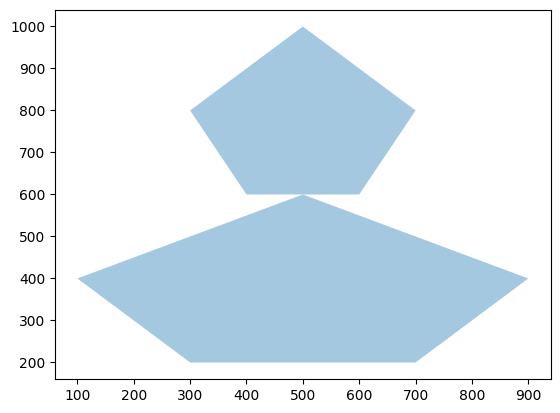

In [5]:
visualize_polygons(p0,p1)

### Problem 1a)

Please fill in all code blocks marked with a #TODO.

In [6]:
def threshold_activation1(x):
    """

    """
    y = np.copy(x)
    y[y <= 0] = 0
    y[y > 0] = 1
    return y


def and_gate(x):
    """
    #TODO: Implement an "and" gate
    solution: convert true or nonzero to 1 else 0
    """
    return np.all(x).astype(int)


def or_gate(x):
    """
    #TODO: Implement an "or" gate
    """
    # # TODO:
    # if np.any(x) > 0:
    #   return 1
    # return 0
    return np.any(x).astype(int)


def analytical_parameters(p0, p1):
    """

    """
    ## Dimensionality
    x_dim = 2
    class_num = 2
    hidden_unit_num = 10
    # First Layer Parameter
    W = np.zeros((hidden_unit_num, x_dim))
    b = np.zeros((hidden_unit_num, 1))
    for i in range(5):
        # First polygon
        x1 = p0[i, 0]
        y1 = p0[i, 1]
        x2 = p0[(i+1)%5, 0]
        y2 = p0[(i+1)%5, 1]
        W[i, :] = [y1 - y2, x2 - x1]
        b[i, :] = x1 * y2 - x2 * y1
        # Second polygon
        x1 = p1[i, 0]
        y1 = p1[i, 1]
        x2 = p1[(i+1)%5, 0]
        y2 = p1[(i+1)%5, 1]
        W[i + 5, :] = [y1 - y2, x2 - x1]
        b[i + 5, :] = x1 * y2 - x2 * y1
    return W,b

def predict_output_v1(X, W, b):
    """

    """
    predictions = []
    for idx in range(data.shape[0]):
        x = np.reshape(X[idx, :], (2, 1))
        # First layer
        first_layer_output = np.matmul(W, x) + b
        first_layer_output = threshold_activation1(first_layer_output)
        # Second layer
        first_polygon = first_layer_output[0:5, :]
        second_polygon = first_layer_output[5:10, :]
        first_gate_output = and_gate(first_polygon)
        second_gate_output = and_gate(second_polygon)
        # Output layer
        input_to_final_gate = [first_gate_output, second_gate_output]
        prediction = or_gate(input_to_final_gate)
        predictions.append(prediction)
    return predictions


def predict_output_v2(X, W, b):
  """
  Predict only points in the first polygon.
  """

  # initialize a list to hold predictions (cache)
  predictions = []

  ## Cycle through data points
  for idx in range(data.shape[0]):
    x = np.reshape(X[idx, :], (2, 1)) # shape is changed for matrix multiplication

    # Linear transform and threshold activation
    first_layer_output = np.matmul(W, x) + b; first_layer_output = threshold_activation1(first_layer_output);

    # Second layer: Only check the first polygon (polygon 1)
    first_polygon = first_layer_output[0:5, :] # Only use the first 5 neurons for polygon 1

    # Give AND gate to the first polygon's neuron outputs
    first_gate_output = and_gate(first_polygon)

    # Add to predictions
    predictions.append(first_gate_output)

  return predictions

def calc_accuracy(true_y, pred_y):
    """

    """
    true_prediction_num = 0
    for i, py in enumerate(pred_y):
        if py == true_y[i]:
            true_prediction_num += 1
    accuracy = true_prediction_num / len(pred_y)
    print("Accuracy: ", accuracy)
    return accuracy

*Sanity check:* If you correctly implemented the 'and gate' and 'or gate', all points should be classified correctly when you make predictions using `predict_output_v1()`

Accuracy:  1.0


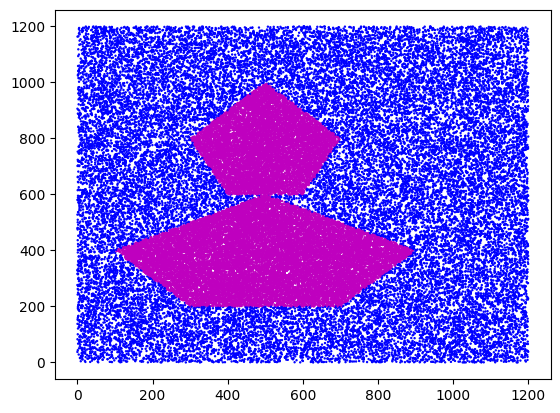

In [7]:
## Load Our Parameters
W, b = analytical_parameters(p0, p1)

## Make Predictions
pred_Y = predict_output_v1(X, W, b)

## Compute Accuracy
acc = calc_accuracy(Y, pred_Y)
assert (acc == 1)

## Visualize Predictions
visualize_datapoints(X, np.array(pred_Y))

In the code above, change the gates in `predict_output_v2()` such that only the points in the top polygon are classified correctly. Visualize your result, report the accuracy of this model, and attach it to the submission.

To further clarify, you should **only** change the usage of the gating functions, not the code inside the gating function itself.

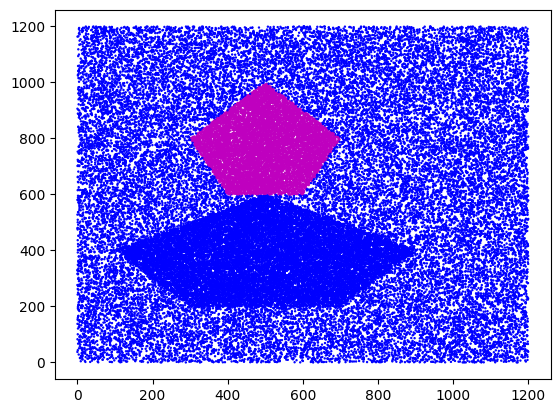

In [8]:
## Load Our Parameters
W, b = analytical_parameters(p0, p1)

## Make Predictions
pred_Y = predict_output_v2(X, W, b)

## Visualize Predictions
visualize_datapoints(X, np.array(pred_Y))

## Problem 1b-d)

Complete problems 1b through 1d in the space below. Please use markdown to clearly distinguish your answers for each part. Include appropriate visualizations generated here in your final report.

# 1.b Building an MLP model with non-linearity using sigmoid activation functions to replace the `AND/OR` gates.

The instructor given requirements

* Architecture:
  * 2 hidden layers and 1 output layer
  * **First hidden layer** - *10 nodes*
  * **Second hidden layer** - *2 nodes*
  * **Output layer** - *1 node* (for binary classification)

* Activation Function:
  * Use the legendary sigmoid activation function

* Loss function:
  * Use BCE (Binary cross entropy loss)
    * *Note: According to PyTorch, BCE with logits is better for numerical stability*

* Weight initialization:
  * Use the Xavier initialization to initialize the weights

* Hyperparameters:
 * Train the model using any combination of batch size, epochs, and learning rate.
 * Use gradient descent for parameter optimization - (SGD)
 * Do not apply regularization

* Training Data:
  * Use 50,000 (83.3%) data points for training and 10,000 (16.7%) for testing - I think this implies no need for validation.. just train-test split
  * Normalize (centre and scale) the data before training

* Performance Metrics:
  * Train the model with 5 random seeds and report the mean and standard deviation of the training and testing accuracy after 500 epochs.
  * Achieve greater than 90% accuracy


In [4]:
# Imports
import numpy as np
import torch
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn
import torch.nn.init as init
from torch.utils.data import TensorDataset, DataLoader

# Data loading and verification

In [10]:
# load data
DATA_PATH = '/content/drive/MyDrive/fall24_hw4_prob1_data.npy'

## Load Data and Check Dimensionality
data = np.load(DATA_PATH)
Y = data[:,2]; # Extracting features
X = data[:,0:2] # Extracting labels

# Verfication of shape (60000, 3)
print(f"Shape of the data: {data.shape}")
X[:5], torch.from_numpy(X[:5]).type(torch.float), X.dtype, Y.dtype

Shape of the data: (60000, 3)


(array([[ 519.48721287,  888.95100171],
        [ 745.53262956,  842.68476576],
        [ 307.78113114,   52.81253746],
        [ 642.98601462,  416.23834844],
        [1069.21247039,  562.52266986]]),
 tensor([[ 519.4872,  888.9510],
         [ 745.5327,  842.6848],
         [ 307.7811,   52.8125],
         [ 642.9860,  416.2383],
         [1069.2125,  562.5226]]),
 dtype('float64'),
 dtype('float64'))

In [11]:
type(X), X.dtype, Y.dtype


(numpy.ndarray, dtype('float64'), dtype('float64'))

# Data Splits and Normalization

In [12]:
# Using 83.3% of the available data for training
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=10000/60000, # 16.67% of the data will be test
                                                    random_state=42 # For reproducibility
                                                    # shuffle=False # Disabled shuffling to maintain order
                                                    )

# # Normalization initialization
# scaler = StandardScaler()

# # Fit and transform on X_train data
# X_train = scaler.fit_transform(X_train)

# # Use the fitted scaler to transform X_test
# X_test = scaler.transform(X_test)

# Get the mean and sd of the training and use
# Mean and sd for the training data
# apply the mean and sd for the training data -- just the good old regular way

mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
std[std==0] = 1

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Convert the data to PyTorch tensors
X_train = torch.from_numpy(X_train).type(torch.float32)
X_test = torch.from_numpy(X_test).type(torch.float32)
y_train = torch.from_numpy(y_train).type(torch.float32).view(-1, 1)  # Reshape for binary classification -- review this later
y_test = torch.from_numpy(y_test).type(torch.float32).view(-1, 1) # Reshape for binary classification -- review this later

# Verification
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")
print(f"{X_train.dtype}, {X_test.dtype}, {y_train.dtype}, {y_test.dtype}")

Training data shape: torch.Size([50000, 2]), Training labels shape: torch.Size([50000, 1])
Test data shape: torch.Size([10000, 2]), Test labels shape: torch.Size([10000, 1])
torch.float32, torch.float32, torch.float32, torch.float32


In [13]:
# Move data to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [14]:
# Now move data back to CPU and convert to NumPy for visualization
X_train_cpu = X_train.cpu().numpy()
y_train_cpu = y_train.cpu().numpy()

# Building the MLP

In [5]:
class PolygonMLP(nn.Module):
  # Constructor as per usual
  def __init__(self, *args, **kwargs) -> None:
      super().__init__(*args, **kwargs)
      self.layer_1 = nn.Linear(in_features=2, out_features=10) # Input layer (x,y coordinates)
      self.layer_2 = nn.Linear(in_features=10, out_features=2) # Hidden layer 1 (sigmoid will need to be applied here)
      self.layer_3 = nn.Linear(in_features=2, out_features=1)  # Hidden layer 2 (sigmoid will need to be applied here)
      self.sigmoid = nn.Sigmoid() # Sigmoid activation function

      # Xavier Initialization
      self.initialize_weights()

  # Weight and bias initializations
  def initialize_weights(self):
    # Weights
    init.xavier_uniform_(self.layer_1.weight)
    init.xavier_uniform_(self.layer_2.weight)
    init.xavier_uniform_(self.layer_3.weight)
    # Biases
    init.zeros_(self.layer_1.bias)
    init.zeros_(self.layer_2.bias)
    init.zeros_(self.layer_3.bias)

  # Forward Propagation function
  def forward(self, x):
    return self.layer_3(self.sigmoid(self.layer_2(self.sigmoid(self.layer_1(x)))))

In [6]:
# Calculating the accuracy --> (True Positive / (True Positive + True Negative))*100
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [7]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """ Prints difference between start and end time. """
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds!😮‍💨")
  return total_time

# Training the model
The following step will be used to train the model:
* Implement a function for training model
* Run experiment
* Plot results
* Visualize results

Oh No! A bad accuraccy observed when training with the entire dataset.

Trying batches - Using the batchsize of 32 (thanks to stack overflow), the accuracy jumped to 99+%. This is good stuff!

Implementation of training function

In [25]:
def train_polygon_model(model_class, X_train, y_train, X_test, y_test, seed, device, batch_size=128):
    from tqdm.auto import  tqdm
    # Set the seed for reproducibility and start the timer
    torch.manual_seed(seed)
    train_time_start_on_cpu = timer()

    # Model reinitialization
    model = model_class().to(device)
    print(f"The model:\n {model}")

    # Setup loss and optimizer
    loss_fn = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.07) # lemme try 0.07 to further smoothen stuff

    # Create Dataloader for batch training
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Instructor-specified epochs
    epochs = 500
    train_losses = []
    test_accuracies = []

    for epoch in tqdm(range(epochs)):
        # Training
        model.train()

        # Initialize accumulators for mean calculations
        epoch_loss = 0
        epoch_acc = 0

        for batch_X, batch_y in train_loader:
            # Move data to the appropriate device (GPU/CPU)
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            # 1. Forward pass
            y_logits = model(batch_X)
            y_pred = torch.round(torch.sigmoid(y_logits))  # Convert logits -> prediction probabilities -> labels

            # 2. Calculate the loss
            loss = loss_fn(y_logits, batch_y)

            # 3. Optimizer zero grad
            optimizer.zero_grad()

            # 4. Backpropagation
            loss.backward()

            # 5. Optimizer step
            optimizer.step()

            # Accumulate loss and accuracy
            epoch_loss += loss.item()
            epoch_acc += accuracy_fn(y_true=batch_y, y_pred=y_pred)

        # Calculate the mean loss and accuracy for the epoch
        avg_loss = epoch_loss / len(train_loader)
        avg_acc = epoch_acc / len(train_loader)

        ### Testing
        model.eval()
        with torch.inference_mode():
            # Move test data to device
            X_test, y_test = X_test.to(device), y_test.to(device)

            # 1. Forward pass on test data
            test_logits = model(X_test)
            test_pred = torch.round(torch.sigmoid(test_logits))

            # 2. Calculate test loss and accuracy
            test_loss = loss_fn(test_logits, y_test)
            test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

            # Store losses and accuracies
            train_losses.append(avg_loss)
            test_accuracies.append(test_acc)

        # Print progress every 20 epochs
        if epoch % 20 == 0:
            print(f"Epoch: {epoch} | Training Loss: {avg_loss:.5f}, Acc: {avg_acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

    # Calculate the training time
    train_time_end_on_cpu = timer()
    total_train_time_model = print_train_time(start=train_time_start_on_cpu,
                                                end=train_time_end_on_cpu,
                                            device=str(next(model.parameters()).device))

    return train_losses, test_accuracies, avg_acc, test_acc, test_pred, total_train_time_model


In [26]:
# check model and move to device
model = PolygonMLP().to(device)
model, device

(PolygonMLP(
   (layer_1): Linear(in_features=2, out_features=10, bias=True)
   (layer_2): Linear(in_features=10, out_features=2, bias=True)
   (layer_3): Linear(in_features=2, out_features=1, bias=True)
   (sigmoid): Sigmoid()
 ),
 device(type='cpu'))

Implemenation of Experimental function

In [27]:
import numpy as np

def run_experiment(model_class, X_train, y_train, X_test, y_test, seeds, device):
    results = []

    # Iterate through the provided seeds
    for seed in seeds:
        print(f"{50 * '-'}😤")
        print(f"\nTraining with seed: {seed}")  # Print the current seed being used

        # Train the model with the current seed
        train_losses, test_accuracies, train_acc, test_acc, test_pred, total_training_time = train_polygon_model(
            model_class, X_train, y_train, X_test, y_test, seed, device)

        # Store the results (training losses, testing accuracies, training accuracy, test accuracy)
        results.append((train_losses, test_accuracies, train_acc, test_acc, test_pred, total_training_time))

    # Extract the training and testing accuracies from the results
    train_accs = [r[2] for r in results]
    test_accs = [r[3] for r in results]
    total_training_time_lst = [r[5] for r in results]

    # Getting the total training time from the array of the training time we created
    total_training_time_in_seconds = np.sum(total_training_time_lst)

    # So, lets make the time look more nice -- We get the time in minutes and in seconds
    minutes = int(total_training_time_in_seconds // 60)
    seconds = int(total_training_time_in_seconds % 60)

    # Reporting the mean and standard deviation for training and testing accuracies
    print(f"\nMean train accuracy: {np.mean(train_accs):.4f} ± {np.std(train_accs):.4f}")
    print(f"Mean test accuracy: {np.mean(test_accs):.4f} ± {np.std(test_accs):.4f}")
    print(f"The total training time: {minutes} minutes and {seconds} seconds! Yayyyy 🤩😮‍💨")

    return results



Implementation of the plotting function

In [28]:
def plot_results(results, seeds):
    plt.figure(figsize=(12, 5))

    # Plot Training Loss
    plt.subplot(1, 2, 1)
    for i, (train_losses, _, _, _, _, _) in enumerate(results):
        plt.plot(train_losses, label=f'Seed {seeds[i]}')
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot Test Accuracy
    plt.subplot(1, 2, 2)
    for i, (_, test_accuracies, _, _, _, _) in enumerate(results):
        plt.plot(test_accuracies, label=f'Seed {seeds[i]}')
    plt.title('Test Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()




--------------------------------------------------😤

Training with seed: 42
The model:
 PolygonMLP(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=2, bias=True)
  (layer_3): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0 | Training Loss: 0.70559, Acc: 39.39% | Test Loss: 0.69887, Test Acc: 33.41%
Epoch: 20 | Training Loss: 0.51981, Acc: 72.73% | Test Loss: 0.51067, Test Acc: 73.68%
Epoch: 40 | Training Loss: 0.50066, Acc: 73.60% | Test Loss: 0.48873, Test Acc: 74.55%
Epoch: 60 | Training Loss: 0.32552, Acc: 87.19% | Test Loss: 0.31330, Test Acc: 87.90%
Epoch: 80 | Training Loss: 0.23537, Acc: 91.58% | Test Loss: 0.22878, Test Acc: 92.18%
Epoch: 100 | Training Loss: 0.15985, Acc: 94.55% | Test Loss: 0.15843, Test Acc: 94.80%
Epoch: 120 | Training Loss: 0.14432, Acc: 94.87% | Test Loss: 0.14337, Test Acc: 95.04%
Epoch: 140 | Training Loss: 0.13203, Acc: 95.14% | Test Loss: 0.13186, Test Acc: 95.20%
Epoch: 160 | Training Loss: 0.10542, Acc: 96.23% | Test Loss: 0.10625, Test Acc: 96.24%
Epoch: 180 | Training Loss: 0.07842, Acc: 97.25% | Test Loss: 0.07952, Test Acc: 97.17%
Epoch: 200 | Training Loss: 0.06327, Acc: 97.75% | Test Loss: 0.06438, Test Acc: 97.68%
Epoch: 220 | Training Loss: 0.05453, A

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0 | Training Loss: 0.69146, Acc: 60.21% | Test Loss: 0.68156, Test Acc: 61.64%
Epoch: 20 | Training Loss: 0.36936, Acc: 85.96% | Test Loss: 0.35401, Test Acc: 86.78%
Epoch: 40 | Training Loss: 0.29276, Acc: 88.80% | Test Loss: 0.27939, Test Acc: 89.45%
Epoch: 60 | Training Loss: 0.16488, Acc: 94.44% | Test Loss: 0.16313, Test Acc: 94.65%
Epoch: 80 | Training Loss: 0.15444, Acc: 94.61% | Test Loss: 0.15255, Test Acc: 94.88%
Epoch: 100 | Training Loss: 0.14845, Acc: 94.78% | Test Loss: 0.14678, Test Acc: 95.00%
Epoch: 120 | Training Loss: 0.13937, Acc: 95.09% | Test Loss: 0.13734, Test Acc: 95.48%
Epoch: 140 | Training Loss: 0.12215, Acc: 95.90% | Test Loss: 0.11950, Test Acc: 96.14%
Epoch: 160 | Training Loss: 0.10189, Acc: 96.62% | Test Loss: 0.09959, Test Acc: 96.87%
Epoch: 180 | Training Loss: 0.08017, Acc: 97.20% | Test Loss: 0.07865, Test Acc: 97.31%
Epoch: 200 | Training Loss: 0.05498, Acc: 98.01% | Test Loss: 0.05426, Test Acc: 98.00%
Epoch: 220 | Training Loss: 0.04788, A

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0 | Training Loss: 0.69644, Acc: 44.46% | Test Loss: 0.69489, Test Acc: 56.83%
Epoch: 20 | Training Loss: 0.53034, Acc: 72.40% | Test Loss: 0.52062, Test Acc: 73.41%
Epoch: 40 | Training Loss: 0.37748, Acc: 85.09% | Test Loss: 0.36211, Test Acc: 85.94%
Epoch: 60 | Training Loss: 0.27688, Acc: 89.32% | Test Loss: 0.26689, Test Acc: 89.67%
Epoch: 80 | Training Loss: 0.17118, Acc: 94.24% | Test Loss: 0.16951, Test Acc: 94.49%
Epoch: 100 | Training Loss: 0.15942, Acc: 94.48% | Test Loss: 0.15799, Test Acc: 94.77%
Epoch: 120 | Training Loss: 0.15087, Acc: 94.71% | Test Loss: 0.14998, Test Acc: 94.90%
Epoch: 140 | Training Loss: 0.13982, Acc: 95.05% | Test Loss: 0.13960, Test Acc: 95.02%
Epoch: 160 | Training Loss: 0.12643, Acc: 95.37% | Test Loss: 0.12708, Test Acc: 95.42%
Epoch: 180 | Training Loss: 0.11505, Acc: 95.77% | Test Loss: 0.11629, Test Acc: 95.63%
Epoch: 200 | Training Loss: 0.10103, Acc: 96.33% | Test Loss: 0.10220, Test Acc: 96.32%
Epoch: 220 | Training Loss: 0.07648, A

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0 | Training Loss: 0.69109, Acc: 52.53% | Test Loss: 0.68752, Test Acc: 56.92%
Epoch: 20 | Training Loss: 0.51010, Acc: 72.82% | Test Loss: 0.49882, Test Acc: 73.91%
Epoch: 40 | Training Loss: 0.32870, Acc: 86.89% | Test Loss: 0.31461, Test Acc: 87.63%
Epoch: 60 | Training Loss: 0.23499, Acc: 92.34% | Test Loss: 0.22186, Test Acc: 93.50%
Epoch: 80 | Training Loss: 0.16644, Acc: 94.32% | Test Loss: 0.16444, Test Acc: 94.50%
Epoch: 100 | Training Loss: 0.15682, Acc: 94.41% | Test Loss: 0.15516, Test Acc: 94.65%
Epoch: 120 | Training Loss: 0.15045, Acc: 94.57% | Test Loss: 0.14886, Test Acc: 94.68%
Epoch: 140 | Training Loss: 0.14148, Acc: 94.88% | Test Loss: 0.13989, Test Acc: 95.17%
Epoch: 160 | Training Loss: 0.12505, Acc: 95.32% | Test Loss: 0.12352, Test Acc: 95.64%
Epoch: 180 | Training Loss: 0.09588, Acc: 96.60% | Test Loss: 0.09493, Test Acc: 96.75%
Epoch: 200 | Training Loss: 0.07490, Acc: 97.33% | Test Loss: 0.07432, Test Acc: 97.45%
Epoch: 220 | Training Loss: 0.06375, A

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0 | Training Loss: 0.69800, Acc: 46.99% | Test Loss: 0.69416, Test Acc: 50.26%
Epoch: 20 | Training Loss: 0.44510, Acc: 84.01% | Test Loss: 0.41906, Test Acc: 87.66%
Epoch: 40 | Training Loss: 0.17197, Acc: 94.39% | Test Loss: 0.16896, Test Acc: 94.54%
Epoch: 60 | Training Loss: 0.15395, Acc: 94.64% | Test Loss: 0.15212, Test Acc: 94.84%
Epoch: 80 | Training Loss: 0.14863, Acc: 94.71% | Test Loss: 0.14679, Test Acc: 94.86%
Epoch: 100 | Training Loss: 0.14472, Acc: 94.83% | Test Loss: 0.14268, Test Acc: 94.96%
Epoch: 120 | Training Loss: 0.14025, Acc: 94.90% | Test Loss: 0.13836, Test Acc: 95.23%
Epoch: 140 | Training Loss: 0.13295, Acc: 95.20% | Test Loss: 0.13121, Test Acc: 95.43%
Epoch: 160 | Training Loss: 0.12189, Acc: 95.69% | Test Loss: 0.12133, Test Acc: 95.79%
Epoch: 180 | Training Loss: 0.10840, Acc: 96.27% | Test Loss: 0.10837, Test Acc: 96.32%
Epoch: 200 | Training Loss: 0.09323, Acc: 96.85% | Test Loss: 0.09427, Test Acc: 96.90%
Epoch: 220 | Training Loss: 0.08028, A

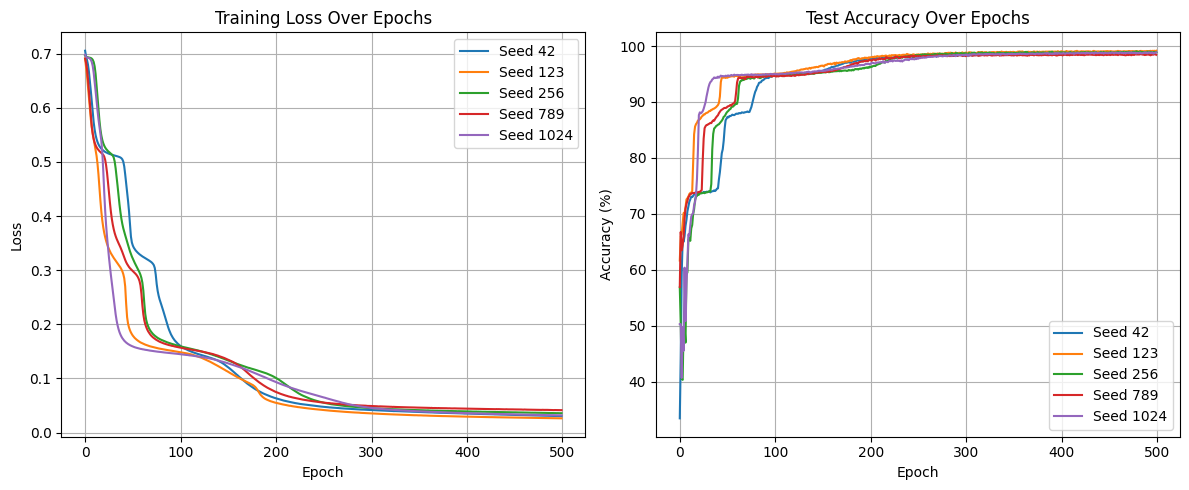

In [29]:
# Define seeds
seeds = [42, 123, 256, 789, 1024]

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Pass the model class (e.g., PolygonMLP) instead of the model instance
results = run_experiment(PolygonMLP, X_train, y_train, X_test, y_test, seeds, device)

# Assuming plot_results function is already defined
plot_results(results, seeds)



# Some comments
The training, testing, and evaluation time per seed was surprisingly long! For instance, with a `batch_size=32`, it took *20 minutes and 33 seconds* for seed `42` to complete 500 epochs.

The total time for training and testing all seeds combined was **1 hour and 32 minutes** for `batch_size=32`.

After discussing with the TA, I decided to try using **larger batch sizes**—and the difference was **huge**! When I increased the `batch_size` to 256, the time for seed `42` to complete 500 epochs dropped to just *5 minutes and 29 seconds*. That’s an incredible improvement!

The total time for training and testing all seeds combined was **27 minutes and 21 seconds** for `batch_size=256`.

This experiment demonstrates how important trade-offs are in machine learning. From this, I’ve learned that when we observe fast convergence (within the first 100 epochs), it might be beneficial to increase the batch size to significantly reduce training time. The `batch_size=256` performs well!

I initially considered using `batch_size=512`, as it reduces training time by about a minute per seed, but I have ultimately decided to stick with `batch_size=256` because it is **faster**, **more reasonable**, and **more robust** for this task. It strikes the right balance between speed, stability, and accuracy.

Actually, upon further review of my work, I have decided to use `batch_size=128` with a `lr=0.07` just to make it "finer". The training time for `seed=42` was **7 minutes 40 seconds**. The total time for training and testing all seeds combined was **37 minutes and 43 seconds** for `batch_size=128` with `lr=0.07`.

Wow. I notice something crazy. All of the results and time I have reported has been on the best GPU colab can offer. But when I ran it with the CPU, it was surprisingly faster which is not what I was expecting as I thought GPU were always faster. I am guessing for simpler problems, CPU is much better and faster while for complex problems, GPU is much better and faster.

The total training time using the cpu: 19 minutes and 31 seconds! Yayyyy 🤩😮‍💨

I did some search on google and found this to be the potential reasons:
> 1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
> 2. The hardware you are using has a better CPU in terms of compute capability than the GPU but this is rare. (Again, I suspect that this is true in this case since the problem is very simple and the dataset is also simple)




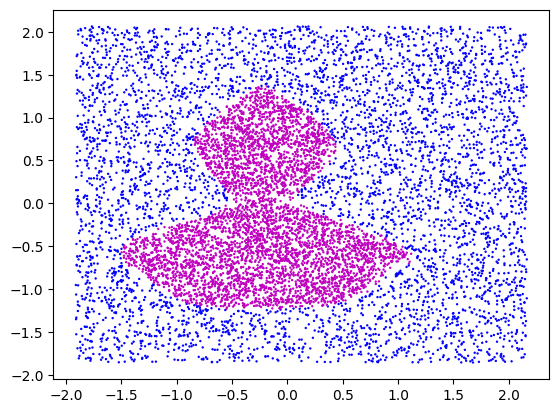

X_test shape: (10000, 2), y_pred shape: (10000,)


In [34]:
# Now move data back to CPU and convert to NumPy for visualization
X_test_cpu = X_test.cpu().numpy()
test_pred_cpu = results[-2][-2].cpu().numpy().flatten()

# Visualize data points (input features and their predicted labels)
visualize_datapoints(X_test_cpu, test_pred_cpu)

# Check the shapes for debugging
print(f"X_test shape: {X_test_cpu.shape}, y_pred shape: {test_pred_cpu.shape}")






In [35]:
model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.4260,  0.0856],
                      [ 0.6769, -0.1745],
                      [ 0.2459, -0.1554],
                      [-0.1230, -0.5265],
                      [ 0.1678, -0.3820],
                      [ 0.2482,  0.2814],
                      [-0.5880, -0.4246],
                      [-0.5902, -0.5741],
                      [-0.4384,  0.2370],
                      [ 0.4837, -0.0576]])),
             ('layer_1.bias',
              tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),
             ('layer_2.weight',
              tensor([[ 0.1802,  0.0915, -0.4138,  0.2361,  0.1000, -0.5458,  0.7033, -0.3316,
                        0.3014, -0.5717],
                      [-0.6371,  0.0219, -0.5214,  0.2133,  0.6015,  0.2925,  0.5331, -0.1017,
                       -0.3217,  0.1491]])),
             ('layer_2.bias', tensor([0., 0.])),
             ('layer_3.weight', tensor([[-0.6330,  0.7192]])),
             ('layer_3.bias',

# Brief Discussion

Based on the results obtained, the `PolygonMLP` solution, which incorporates the MLP approach, performs nearly as well as the manual `AND/OR` gate solution from *part (a)*. The MLP achieves a mean test accuracy of 99.3380%, just 0.662% below the manual solution's perfect 100%.

Initially, I mistakenly trained the entire dataset at once, leading to poor performance with an accuracy of around 50%, suggesting that the model was essentially guessing. After adjusting the parameters by setting `batch_size=32` and `lr=0.1`, the model's accuracy improved significantly. However, training with a `batch_size=32` took a considerable amount of time (around 90 minutes), prompting further experimentation.

Upon using `batch_size=256` and other batch sizes, the training time dropped dramatically to just 27 minutes and lower without sacrificing performance, with the model achieving nearly identical accuracy. The batch size of 256 proved to be faster, more efficient, and robust, offering the best trade-off between speed and accuracy for this task.

The slight difference in accuracy between the MLP and manual solution is likely due to numerical precision and the inherent stochasticity of neural networks compared to the deterministic logic of the manual solution.

Actually, upon further review of my work, I have decided to use `batch_size=128` with a `lr=0.07` just to make it "finer". The training time for `seed=42` was **7 minutes 40 seconds**. The total time for training and testing all seeds combined was **37 minutes and 43 seconds** for `batch_size=128` with `lr=0.07`.

Overall, the MLP approach is versatile and scalable, making it a more robust and practical solution for this problem and similar tasks in the future.


# Saving my current Polygon MLP model, loading it, and using it for inference.

This took me forever to do since I am very new to ML. I would be trying the `torch.save()` and `torch.load()` to save and models, respectively.
`torch.nn.Module.load_state_dict()` - this allows me to load a model's saved state dictionary

In [42]:
# Imports
import numpy as np
import torch
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn
import torch.nn.init as init
from torch.utils.data import TensorDataset, DataLoader

In [43]:
# Saving my PyTorch model
from pathlib import Path

# Create model's directory
MODEL_PATH = Path("DL_HW4_models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "DL_HW4_model_solution.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH
           )

Saving model to: DL_HW4_models/DL_HW4_model_solution.pth


In [44]:
!ls -l DL_HW4_models

total 4
-rw-r--r-- 1 root root 2900 Oct 11 19:41 DL_HW4_model_solution.pth


In [45]:
## Loading a PyTorch
loaded_model_1 = PolygonMLP()
# Load the saved state_dict of model_0
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-45-d96660ea450b>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

## 1.c) Build an MLP with a larger capacity (increase the depth and width).

In [51]:
class PolygonMLP_V2(nn.Module):
  # the new constructor
  def __init__(self,
               input_size=2,
               hidden_sizes=[10, 2], # This can modified
               output_size=1
               ):
    """
    Args:
    As per default/give requirments:
    input_size (int): Number of input features (default is 2 for (x, y)).
    output_size (int): Number of output features (default is 1).
    hidden_sizes (int): Number of hidden layers can be modified
    """
    super().__init__()
    self.layers = nn.ModuleList() # Creates a list to hold the layers

    # Input layer: Connect the input size to the first hidden layer
    self.layers.append(nn.Linear(input_size, hidden_sizes[0]))

    # Hidden layer: Connect the hidden layers
    for i in range(len(hidden_sizes) - 1):
      self.layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))

    # Output layer
    self.layers.append(nn.Linear(hidden_sizes[-1], output_size))

    # Activation function (Sigmoid)
    self.sigmoid = nn.Sigmoid()

    # Initialize weights via Xavier init
    self.initialize_weights()

    # function for initializing weights and biases
  def initialize_weights(self):
      for layer in self.layers:
        nn.init.xavier_uniform_(layer.weight)
        nn.init.zeros_(layer.bias)

  def forward(self, x):
    # Pass input through all layers except the last one
    for layer in self.layers[:-1]:
        x = self.sigmoid(layer(x))
    return self.layers[-1](x)


In [52]:
# Deeper architecture and moving to device
deep_and_wide_model = lambda: PolygonMLP_V2(hidden_sizes=[128, 64, 32, 16, 8]).to(device)# I am going to use a lambda function to pass this to the run_experiment parameter - helps createa a nerw instance of the models for each seed



--------------------------------------------------😤

Training with seed: 42
The model:
 PolygonMLP_V2(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): Linear(in_features=32, out_features=16, bias=True)
    (4): Linear(in_features=16, out_features=8, bias=True)
    (5): Linear(in_features=8, out_features=1, bias=True)
  )
  (sigmoid): Sigmoid()
)


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0 | Training Loss: 0.69334, Acc: 49.63% | Test Loss: 0.69320, Test Acc: 49.74%
Epoch: 20 | Training Loss: 0.69316, Acc: 50.25% | Test Loss: 0.69382, Test Acc: 49.74%
Epoch: 40 | Training Loss: 0.69282, Acc: 51.27% | Test Loss: 0.69280, Test Acc: 49.74%
Epoch: 60 | Training Loss: 0.68861, Acc: 57.69% | Test Loss: 0.68800, Test Acc: 47.78%
Epoch: 80 | Training Loss: 0.51180, Acc: 72.80% | Test Loss: 0.50192, Test Acc: 74.03%
Epoch: 100 | Training Loss: 0.41690, Acc: 80.61% | Test Loss: 0.39968, Test Acc: 81.80%
Epoch: 120 | Training Loss: 0.31233, Acc: 87.03% | Test Loss: 0.30041, Test Acc: 87.55%
Epoch: 140 | Training Loss: 0.08894, Acc: 96.82% | Test Loss: 0.08158, Test Acc: 97.37%
Epoch: 160 | Training Loss: 0.05358, Acc: 98.09% | Test Loss: 0.05543, Test Acc: 98.05%
Epoch: 180 | Training Loss: 0.04258, Acc: 98.51% | Test Loss: 0.05057, Test Acc: 98.02%
Epoch: 200 | Training Loss: 0.03696, Acc: 98.75% | Test Loss: 0.03126, Test Acc: 98.96%
Epoch: 220 | Training Loss: 0.03317, A

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0 | Training Loss: 0.69591, Acc: 50.38% | Test Loss: 0.69314, Test Acc: 49.74%
Epoch: 20 | Training Loss: 0.69326, Acc: 49.88% | Test Loss: 0.69304, Test Acc: 50.26%
Epoch: 40 | Training Loss: 0.69299, Acc: 50.72% | Test Loss: 0.69299, Test Acc: 50.26%
Epoch: 60 | Training Loss: 0.69106, Acc: 54.55% | Test Loss: 0.69061, Test Acc: 54.65%
Epoch: 80 | Training Loss: 0.51201, Acc: 72.81% | Test Loss: 0.50090, Test Acc: 73.87%
Epoch: 100 | Training Loss: 0.36817, Acc: 83.88% | Test Loss: 0.35584, Test Acc: 84.80%
Epoch: 120 | Training Loss: 0.30228, Acc: 87.23% | Test Loss: 0.29826, Test Acc: 87.50%
Epoch: 140 | Training Loss: 0.08640, Acc: 97.13% | Test Loss: 0.09484, Test Acc: 96.68%
Epoch: 160 | Training Loss: 0.05391, Acc: 98.14% | Test Loss: 0.05094, Test Acc: 98.25%
Epoch: 180 | Training Loss: 0.04071, Acc: 98.59% | Test Loss: 0.06403, Test Acc: 97.64%
Epoch: 200 | Training Loss: 0.03391, Acc: 98.86% | Test Loss: 0.03652, Test Acc: 98.72%
Epoch: 220 | Training Loss: 0.03161, A

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0 | Training Loss: 0.69418, Acc: 49.46% | Test Loss: 0.69333, Test Acc: 49.74%
Epoch: 20 | Training Loss: 0.69309, Acc: 50.47% | Test Loss: 0.69293, Test Acc: 50.26%
Epoch: 40 | Training Loss: 0.69235, Acc: 52.02% | Test Loss: 0.69270, Test Acc: 49.74%
Epoch: 60 | Training Loss: 0.57994, Acc: 69.14% | Test Loss: 0.56268, Test Acc: 70.90%
Epoch: 80 | Training Loss: 0.41914, Acc: 80.44% | Test Loss: 0.40212, Test Acc: 81.76%
Epoch: 100 | Training Loss: 0.31028, Acc: 87.36% | Test Loss: 0.29943, Test Acc: 87.89%
Epoch: 120 | Training Loss: 0.11590, Acc: 95.92% | Test Loss: 0.12641, Test Acc: 95.00%
Epoch: 140 | Training Loss: 0.05781, Acc: 97.85% | Test Loss: 0.06687, Test Acc: 97.24%
Epoch: 160 | Training Loss: 0.04412, Acc: 98.39% | Test Loss: 0.05021, Test Acc: 97.91%
Epoch: 180 | Training Loss: 0.03716, Acc: 98.66% | Test Loss: 0.07306, Test Acc: 97.48%
Epoch: 200 | Training Loss: 0.03265, Acc: 98.92% | Test Loss: 0.03525, Test Acc: 98.55%
Epoch: 220 | Training Loss: 0.03150, A

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0 | Training Loss: 0.69325, Acc: 50.25% | Test Loss: 0.69312, Test Acc: 50.26%
Epoch: 20 | Training Loss: 0.69316, Acc: 50.17% | Test Loss: 0.69301, Test Acc: 50.26%
Epoch: 40 | Training Loss: 0.69291, Acc: 50.99% | Test Loss: 0.69271, Test Acc: 45.03%
Epoch: 60 | Training Loss: 0.68798, Acc: 58.83% | Test Loss: 0.68688, Test Acc: 68.97%
Epoch: 80 | Training Loss: 0.50904, Acc: 72.76% | Test Loss: 0.49912, Test Acc: 73.89%
Epoch: 100 | Training Loss: 0.37217, Acc: 83.52% | Test Loss: 0.36004, Test Acc: 84.37%
Epoch: 120 | Training Loss: 0.24818, Acc: 90.09% | Test Loss: 0.23998, Test Acc: 90.46%
Epoch: 140 | Training Loss: 0.08305, Acc: 97.07% | Test Loss: 0.08054, Test Acc: 97.11%
Epoch: 160 | Training Loss: 0.05744, Acc: 97.95% | Test Loss: 0.05061, Test Acc: 98.11%
Epoch: 180 | Training Loss: 0.04740, Acc: 98.33% | Test Loss: 0.04067, Test Acc: 98.59%
Epoch: 200 | Training Loss: 0.04126, Acc: 98.57% | Test Loss: 0.03560, Test Acc: 98.79%
Epoch: 220 | Training Loss: 0.03662, A

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0 | Training Loss: 0.69429, Acc: 50.25% | Test Loss: 0.69331, Test Acc: 49.74%
Epoch: 20 | Training Loss: 0.69310, Acc: 50.54% | Test Loss: 0.69300, Test Acc: 49.74%
Epoch: 40 | Training Loss: 0.69282, Acc: 50.95% | Test Loss: 0.69279, Test Acc: 50.26%
Epoch: 60 | Training Loss: 0.68835, Acc: 59.00% | Test Loss: 0.68725, Test Acc: 68.86%
Epoch: 80 | Training Loss: 0.50784, Acc: 72.78% | Test Loss: 0.49681, Test Acc: 74.06%
Epoch: 100 | Training Loss: 0.36205, Acc: 84.08% | Test Loss: 0.35597, Test Acc: 84.59%
Epoch: 120 | Training Loss: 0.25335, Acc: 89.62% | Test Loss: 0.23721, Test Acc: 90.68%
Epoch: 140 | Training Loss: 0.07894, Acc: 97.29% | Test Loss: 0.09699, Test Acc: 96.00%
Epoch: 160 | Training Loss: 0.05754, Acc: 97.89% | Test Loss: 0.05597, Test Acc: 97.86%
Epoch: 180 | Training Loss: 0.04690, Acc: 98.29% | Test Loss: 0.05527, Test Acc: 97.77%
Epoch: 200 | Training Loss: 0.03963, Acc: 98.57% | Test Loss: 0.03947, Test Acc: 98.46%
Epoch: 220 | Training Loss: 0.03441, A

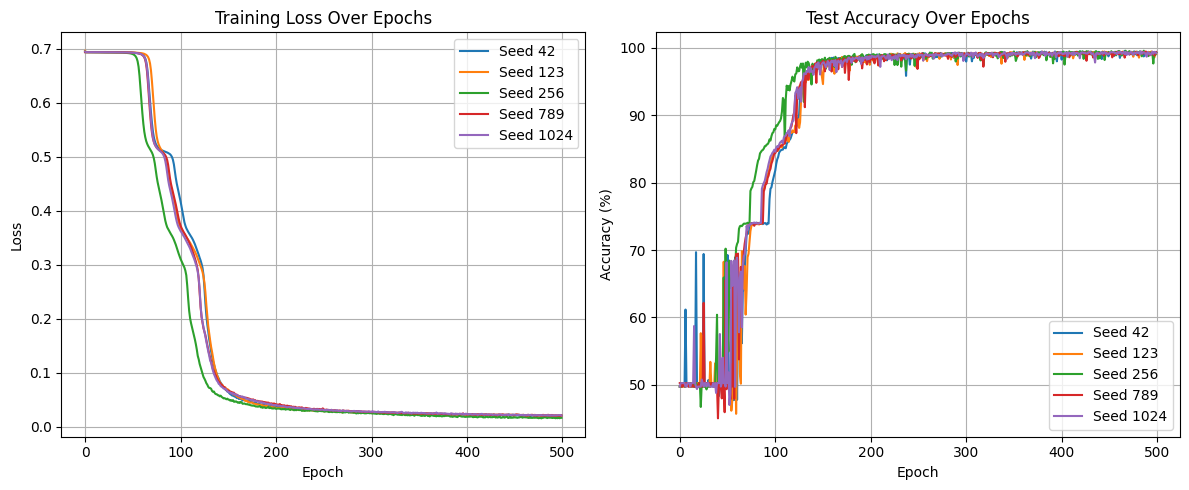

In [53]:
# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Prepare data
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Seeds
seeds = [42, 123, 256, 789, 1024]

# Run the experiment
# Run the experiment
results = run_experiment(deep_and_wide_model, X_train, y_train, X_test, y_test, seeds, device)

# Plot the results
plot_results(results, seeds)

The train time for the deeper and wider architecture is **45 minutes 49 seconds**.  

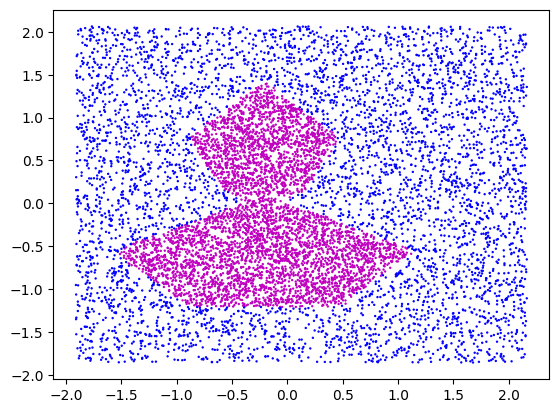

In [54]:
# Now move data back to CPU and convert to NumPy for visualization
X_test_cpu = X_test.cpu().numpy()
test_pred_cpu = results[-2][-2].cpu().numpy().flatten()

# Visualize data points (input features and their predicted labels)
visualize_datapoints(X_test_cpu, test_pred_cpu)

## Problem 2

All code for Problem 2 should go below. We provide data loaders and relevant imports to get you started. If you are working locally (instead of using Google Colab), we recommend using Conda to install pytorch (https://pytorch.org).

### Imports

In [1]:
## Additional External Libraries (Deep Learning)
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as tfs
from PIL import Image
from torchvision.datasets import FashionMNIST
from torch.utils.data import SubsetRandomSampler

### Data Loading

In [2]:
# Hyperparameter (Feel Free to Change These, but Make Sure your Training Loop Still Works as Expected)
TRAIN_BATCH_SIZE = 50
VAL_BATCH_SIZE = 50
TEST_BATCH_SIZE = 1

# Transform data to PIL images
transforms = tfs.Compose([tfs.ToTensor()])

# Train/Val Subsets
train_mask = range(50000)
val_mask = range(50000, 60000)

# Download/Load Dataset
train_dataset = FashionMNIST('./data', train=True, transform=transforms, download=True)
test_dataset = FashionMNIST('./data', train=False, transform=transforms, download=True)

# Data Loaders
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, sampler=SubsetRandomSampler(train_mask))
val_dataloader = DataLoader(train_dataset, batch_size=VAL_BATCH_SIZE, sampler=SubsetRandomSampler(val_mask))
test_dataloader = DataLoader(test_dataset, batch_size=TEST_BATCH_SIZE)

100%|██████████| 26421880/26421880 [00:05<00:00, 4448419.12it/s] 


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 271149.99it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5007317.58it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6206460.76it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



## Problem 2a)

### Design Model

In [3]:
class CNNet(nn.Module):
    def __init__(self):
        super(CNNet, self).__init__()

        self.num_classes = 10

        # Block 1
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        # Block 2
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        # Block 3
        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        # Classifier
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=128 * 3 * 3, out_features=self.num_classes)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.conv_block_3(x)
        x = self.classifier(x)
        return x

### Model Training

In [4]:
# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # device agnostic

In [5]:
def train(model, optimizer, loss_fn, lr, epochs=50, train_dataloader=train_dataloader, val_dataloader=val_dataloader, test_dataloader=test_dataloader, **kwargs):
    import torch
    from tqdm.auto import tqdm
    from timeit import default_timer as timer

    torch.manual_seed(42)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    train_losses = []
    val_accuracies = []
    test_accuracies = []
    best_val_accuracy = 0
    best_model = None
    best_epoch = 0
    best_train_acc = 0
    best_test_acc = 0

    train_time_start = timer()

    print(model)
    print(f"\nWhen I wrote this code, all God and I knew what I did 😤. But now, only God knows 🥺!\n{'-'*50}")

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        train_acc = 0

        # Training loop
        for batch in tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{epochs}"):
            images, labels = batch
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            batch_loss = loss_fn(outputs, labels)
            batch_loss.backward()
            optimizer.step()
            train_loss += batch_loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_acc += (predicted == labels).sum().item()

        avg_train_loss = train_loss / len(train_dataloader)
        avg_train_acc = 100 * train_acc / len(train_dataloader.dataset)
        train_losses.append(avg_train_loss)

        # Validation loop
        model.eval()
        val_correct = 0
        val_total = 0
        with torch.inference_mode():
            for batch in val_dataloader:
                images, labels = batch
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_accuracy = 100 * val_correct / val_total
        val_accuracies.append(val_accuracy)

        # Test loop
        test_correct = 0
        test_total = 0
        with torch.inference_mode():
            for batch in test_dataloader:
                images, labels = batch
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                test_total += labels.size(0)
                test_correct += (predicted == labels).sum().item()

        test_accuracy = 100 * test_correct / test_total
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f} ___|___ Train Acc: {avg_train_acc:.2f}% | Val Accuracy: {val_accuracy:.2f}% | Test Accuracy: {test_accuracy:.2f}%\n")

        # Save the best model
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_model = model.state_dict()
            best_epoch = epoch + 1
            best_train_acc = avg_train_acc
            best_test_acc = test_accuracy

    # Calculate the training time
    train_time_end = timer()
    total_train_time = train_time_end - train_time_start
    minutes, seconds = divmod(total_train_time, 60)

    print(f"Total training time: {int(minutes)} minutes and {seconds:.2f} seconds!😤")

    # Load the best model
    model.load_state_dict(best_model)
    print(f"Best model was obtained at epoch {best_epoch}")
    print(f"Best Train Accuracy: {best_train_acc:.2f}% 😤😮‍💨")
    print(f"Best Validation Accuracy: {best_val_accuracy:.2f}% 😤😮‍💨")
    print(f"Best Test Accuracy: {best_test_acc:.2f}% 😤😮‍💨")

    return model, train_losses, val_accuracies, test_accuracies, total_train_time, best_epoch, best_train_acc, best_val_accuracy, best_test_acc

In [6]:
import matplotlib.pyplot as plt

def plot_results(train_losses, val_accuracies, test_accuracies, seed=None):
    plt.figure(figsize=(15, 5))

    # Plotting  Training Loss
    plt.subplot(1, 3, 1)
    plt.plot(train_losses, label=f'Seed {seed}' if seed else 'Training Loss')
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    if seed:
        plt.legend()
    plt.grid(True)

    # Plotting Validation Accuracy
    plt.subplot(1, 3, 2)
    plt.plot(val_accuracies, label=f'Seed {seed}' if seed else 'Validation Accuracy')
    plt.title('Validation Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    if seed:
        plt.legend()
    plt.grid(True)

    # Plotting Test Accuracy
    plt.subplot(1, 3, 3)
    plt.plot(test_accuracies, label=f'Seed {seed}' if seed else 'Test Accuracy')
    plt.title('Test Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    if seed:
        plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


In [7]:
## Hyperparameters
EPOCH = 50
LR = 0.0007 ##TODO: Choose a Learning Rate

## Setting up the model, optimizer, and loss function
model = CNNet()
optimizer = torch.optim.Adam(model.parameters(), lr=LR) # Adam was already working great with a learning rate of 0.001
# I went back to Adam as this was very unstable
loss_f = nn.CrossEntropyLoss()##TODO: Choose a loss -- duh crossentropy all day everyday

In [59]:
## Run Training Loop
model, train_losses, val_accuracies, test_accuracies, total_train_time, best_epoch, best_train_acc, best_val_accuracy, best_test_acc = train(model, optimizer, loss_f, LR)

CNNet(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_fe

Epoch 1/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1/50, Train Loss: 0.5431 ___|___ Train Acc: 66.72% | Val Accuracy: 87.14% | Test Accuracy: 86.49%



Epoch 2/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2/50, Train Loss: 0.3178 ___|___ Train Acc: 73.59% | Val Accuracy: 89.93% | Test Accuracy: 89.48%



Epoch 3/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3/50, Train Loss: 0.2675 ___|___ Train Acc: 75.22% | Val Accuracy: 90.22% | Test Accuracy: 89.66%



Epoch 4/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4/50, Train Loss: 0.2322 ___|___ Train Acc: 76.28% | Val Accuracy: 90.92% | Test Accuracy: 90.57%



Epoch 5/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5/50, Train Loss: 0.2064 ___|___ Train Acc: 77.09% | Val Accuracy: 91.24% | Test Accuracy: 91.29%



Epoch 6/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6/50, Train Loss: 0.1858 ___|___ Train Acc: 77.64% | Val Accuracy: 91.88% | Test Accuracy: 91.46%



Epoch 7/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7/50, Train Loss: 0.1635 ___|___ Train Acc: 78.38% | Val Accuracy: 91.58% | Test Accuracy: 91.34%



Epoch 8/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8/50, Train Loss: 0.1448 ___|___ Train Acc: 78.87% | Val Accuracy: 92.25% | Test Accuracy: 91.71%



Epoch 9/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9/50, Train Loss: 0.1239 ___|___ Train Acc: 79.53% | Val Accuracy: 92.01% | Test Accuracy: 91.84%



Epoch 10/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10/50, Train Loss: 0.1082 ___|___ Train Acc: 80.01% | Val Accuracy: 92.24% | Test Accuracy: 92.04%



Epoch 11/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11/50, Train Loss: 0.0931 ___|___ Train Acc: 80.48% | Val Accuracy: 92.44% | Test Accuracy: 91.96%



Epoch 12/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12/50, Train Loss: 0.0779 ___|___ Train Acc: 80.95% | Val Accuracy: 91.48% | Test Accuracy: 91.48%



Epoch 13/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13/50, Train Loss: 0.0681 ___|___ Train Acc: 81.29% | Val Accuracy: 91.92% | Test Accuracy: 91.90%



Epoch 14/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14/50, Train Loss: 0.0575 ___|___ Train Acc: 81.61% | Val Accuracy: 92.25% | Test Accuracy: 91.26%



Epoch 15/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15/50, Train Loss: 0.0515 ___|___ Train Acc: 81.78% | Val Accuracy: 92.14% | Test Accuracy: 91.83%



Epoch 16/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16/50, Train Loss: 0.0453 ___|___ Train Acc: 81.91% | Val Accuracy: 92.36% | Test Accuracy: 91.86%



Epoch 17/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17/50, Train Loss: 0.0411 ___|___ Train Acc: 82.10% | Val Accuracy: 91.49% | Test Accuracy: 91.23%



Epoch 18/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18/50, Train Loss: 0.0409 ___|___ Train Acc: 82.08% | Val Accuracy: 91.87% | Test Accuracy: 91.53%



Epoch 19/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19/50, Train Loss: 0.0348 ___|___ Train Acc: 82.27% | Val Accuracy: 91.53% | Test Accuracy: 91.57%



Epoch 20/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20/50, Train Loss: 0.0317 ___|___ Train Acc: 82.41% | Val Accuracy: 91.54% | Test Accuracy: 90.94%



Epoch 21/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21/50, Train Loss: 0.0323 ___|___ Train Acc: 82.34% | Val Accuracy: 91.79% | Test Accuracy: 91.85%



Epoch 22/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22/50, Train Loss: 0.0313 ___|___ Train Acc: 82.38% | Val Accuracy: 91.52% | Test Accuracy: 91.45%



Epoch 23/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23/50, Train Loss: 0.0315 ___|___ Train Acc: 82.40% | Val Accuracy: 91.45% | Test Accuracy: 91.19%



Epoch 24/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24/50, Train Loss: 0.0245 ___|___ Train Acc: 82.61% | Val Accuracy: 92.24% | Test Accuracy: 91.67%



Epoch 25/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25/50, Train Loss: 0.0304 ___|___ Train Acc: 82.38% | Val Accuracy: 91.60% | Test Accuracy: 90.97%



Epoch 26/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26/50, Train Loss: 0.0274 ___|___ Train Acc: 82.50% | Val Accuracy: 92.04% | Test Accuracy: 91.45%



Epoch 27/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27/50, Train Loss: 0.0277 ___|___ Train Acc: 82.50% | Val Accuracy: 91.75% | Test Accuracy: 91.67%



Epoch 28/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28/50, Train Loss: 0.0217 ___|___ Train Acc: 82.69% | Val Accuracy: 91.79% | Test Accuracy: 91.75%



Epoch 29/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29/50, Train Loss: 0.0271 ___|___ Train Acc: 82.52% | Val Accuracy: 91.71% | Test Accuracy: 91.60%



Epoch 30/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30/50, Train Loss: 0.0232 ___|___ Train Acc: 82.66% | Val Accuracy: 92.01% | Test Accuracy: 91.62%



Epoch 31/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31/50, Train Loss: 0.0263 ___|___ Train Acc: 82.56% | Val Accuracy: 92.03% | Test Accuracy: 91.58%



Epoch 32/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32/50, Train Loss: 0.0208 ___|___ Train Acc: 82.75% | Val Accuracy: 91.72% | Test Accuracy: 91.57%



Epoch 33/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33/50, Train Loss: 0.0227 ___|___ Train Acc: 82.67% | Val Accuracy: 91.84% | Test Accuracy: 91.62%



Epoch 34/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34/50, Train Loss: 0.0251 ___|___ Train Acc: 82.61% | Val Accuracy: 91.91% | Test Accuracy: 91.59%



Epoch 35/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35/50, Train Loss: 0.0210 ___|___ Train Acc: 82.74% | Val Accuracy: 91.95% | Test Accuracy: 92.03%



Epoch 36/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36/50, Train Loss: 0.0228 ___|___ Train Acc: 82.72% | Val Accuracy: 91.61% | Test Accuracy: 91.39%



Epoch 37/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37/50, Train Loss: 0.0200 ___|___ Train Acc: 82.75% | Val Accuracy: 91.88% | Test Accuracy: 91.34%



Epoch 38/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38/50, Train Loss: 0.0260 ___|___ Train Acc: 82.62% | Val Accuracy: 91.59% | Test Accuracy: 91.37%



Epoch 39/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39/50, Train Loss: 0.0209 ___|___ Train Acc: 82.76% | Val Accuracy: 91.67% | Test Accuracy: 91.19%



Epoch 40/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40/50, Train Loss: 0.0230 ___|___ Train Acc: 82.69% | Val Accuracy: 91.78% | Test Accuracy: 91.75%



Epoch 41/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41/50, Train Loss: 0.0172 ___|___ Train Acc: 82.86% | Val Accuracy: 91.89% | Test Accuracy: 91.81%



Epoch 42/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42/50, Train Loss: 0.0248 ___|___ Train Acc: 82.64% | Val Accuracy: 91.52% | Test Accuracy: 91.52%



Epoch 43/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43/50, Train Loss: 0.0213 ___|___ Train Acc: 82.74% | Val Accuracy: 91.72% | Test Accuracy: 91.55%



Epoch 44/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44/50, Train Loss: 0.0200 ___|___ Train Acc: 82.82% | Val Accuracy: 91.73% | Test Accuracy: 91.32%



Epoch 45/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45/50, Train Loss: 0.0194 ___|___ Train Acc: 82.83% | Val Accuracy: 91.78% | Test Accuracy: 91.64%



Epoch 46/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46/50, Train Loss: 0.0185 ___|___ Train Acc: 82.83% | Val Accuracy: 92.14% | Test Accuracy: 91.99%



Epoch 47/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47/50, Train Loss: 0.0160 ___|___ Train Acc: 82.89% | Val Accuracy: 91.80% | Test Accuracy: 91.78%



Epoch 48/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48/50, Train Loss: 0.0225 ___|___ Train Acc: 82.76% | Val Accuracy: 91.40% | Test Accuracy: 91.99%



Epoch 49/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49/50, Train Loss: 0.0162 ___|___ Train Acc: 82.89% | Val Accuracy: 91.66% | Test Accuracy: 91.94%



Epoch 50/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50/50, Train Loss: 0.0205 ___|___ Train Acc: 82.80% | Val Accuracy: 91.71% | Test Accuracy: 91.80%

Total training time: 18 minutes and 31.31 seconds!😤
Best model was obtained at epoch 11
Best Train Accuracy: 80.48% 😤😮‍💨
Best Validation Accuracy: 92.44% 😤😮‍💨
Best Test Accuracy: 91.96% 😤😮‍💨


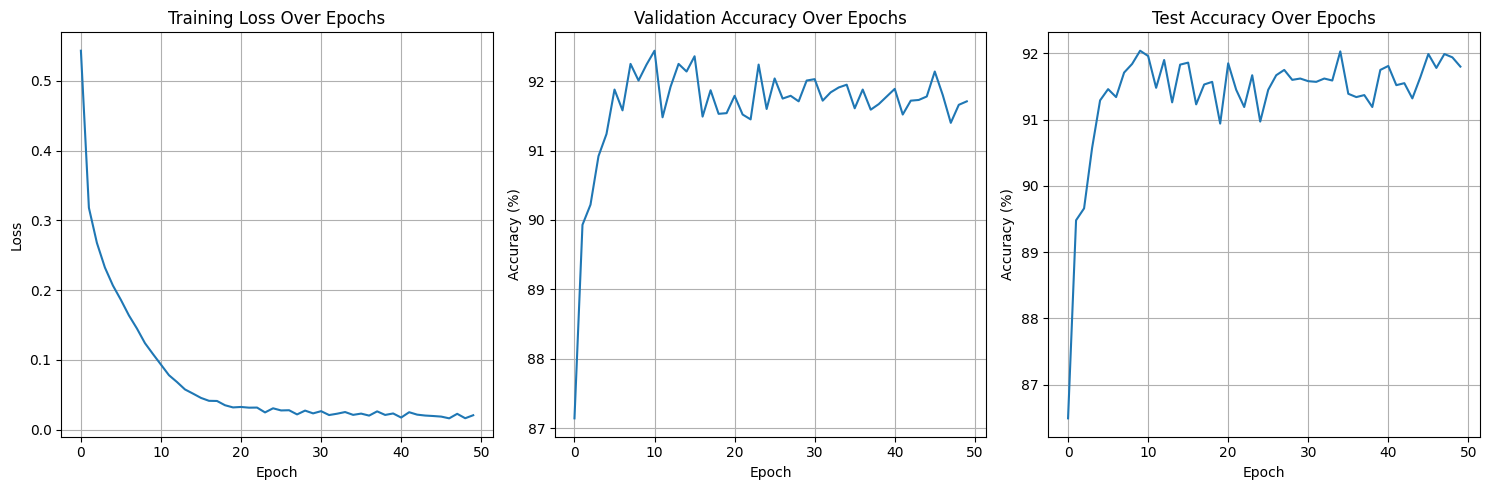

In [60]:
plot_results(train_losses, val_accuracies, test_accuracies)

## Problem 2b)

Now try to improve your model using additional techniques learned during class. You should be able to use the same training function as above, but will need to create a new model architecture.

### Data Loading

You should maintain the splits from above, but feel free to alter the dataloaders (i.e. transforms) as you wish.

In [8]:
# Hyperparameter (Feel Free to Change These, but Make Sure your Training Loop Still Works as Expected)
TRAIN_BATCH_SIZE = 50
VAL_BATCH_SIZE = 50
TEST_BATCH_SIZE = 1

# Transform data to PIL images
transforms = tfs.Compose([tfs.ToTensor()]) ##TODO: Use the same from above or consider alternatives

# Train/Val Subsets
train_mask = range(50000)
val_mask = range(50000, 60000)

# Download/Load Dataset
train_dataset = FashionMNIST('./data', train=True, transform=transforms, download=True)
test_dataset = FashionMNIST('./data', train=False, transform=transforms, download=True)

# Data Loaders
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, sampler=SubsetRandomSampler(train_mask))
val_dataloader = DataLoader(train_dataset, batch_size=VAL_BATCH_SIZE, sampler=SubsetRandomSampler(val_mask))
test_dataloader = DataLoader(test_dataset, batch_size=TEST_BATCH_SIZE)

### Model Design

In [9]:
##TODO: Try to improve upon your previous architecture
import torch
import torch.nn as nn

class ImprovedCNNet(nn.Module):
    def __init__(self):
        super(ImprovedCNNet, self).__init__()
        self.num_classes = 10

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.25)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.25)
        )

        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.25)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 3 * 3, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, self.num_classes)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.conv_block_3(x)
        x = self.classifier(x)
        return x

# Create the model
model = ImprovedCNNet()

# Use Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Use CrossEntropyLoss
criterion = nn.CrossEntropyLoss()

In [10]:
## The legendary Hyperparameters
EPOCH = 50
LR = 0.0003 ##TODO: Choose a Learning Rate

## Setting up the model, optimizer, and loss function
model = ImprovedCNNet()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
loss_f = nn.CrossEntropyLoss()##TODO: Choose a loss

### Model Training

In [11]:
##TODO: Fit and evaluate your model. What do you observe?

## Run Training Loop
model, train_losses, val_accuracies, test_accuracies, total_train_time, best_epoch, best_train_acc, best_val_accuracy, best_test_acc = train(model, optimizer, loss_f, LR)
# improved_out = train(model, optimizer, loss_f, LR)

ImprovedCNNet(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout(p=0.25, inplace=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=F

Epoch 1/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1/50, Train Loss: 0.5424 ___|___ Train Acc: 66.70% | Val Accuracy: 87.75% | Test Accuracy: 87.11%



Epoch 2/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2/50, Train Loss: 0.3288 ___|___ Train Acc: 73.36% | Val Accuracy: 90.47% | Test Accuracy: 90.08%



Epoch 3/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3/50, Train Loss: 0.2865 ___|___ Train Acc: 74.57% | Val Accuracy: 91.71% | Test Accuracy: 91.21%



Epoch 4/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4/50, Train Loss: 0.2598 ___|___ Train Acc: 75.47% | Val Accuracy: 92.19% | Test Accuracy: 91.38%



Epoch 5/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5/50, Train Loss: 0.2421 ___|___ Train Acc: 75.90% | Val Accuracy: 92.05% | Test Accuracy: 91.75%



Epoch 6/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6/50, Train Loss: 0.2287 ___|___ Train Acc: 76.31% | Val Accuracy: 92.30% | Test Accuracy: 91.67%



Epoch 7/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7/50, Train Loss: 0.2182 ___|___ Train Acc: 76.66% | Val Accuracy: 92.80% | Test Accuracy: 92.14%



Epoch 8/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8/50, Train Loss: 0.2053 ___|___ Train Acc: 77.00% | Val Accuracy: 93.11% | Test Accuracy: 92.43%



Epoch 9/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9/50, Train Loss: 0.1960 ___|___ Train Acc: 77.23% | Val Accuracy: 93.00% | Test Accuracy: 92.23%



Epoch 10/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10/50, Train Loss: 0.1887 ___|___ Train Acc: 77.49% | Val Accuracy: 93.19% | Test Accuracy: 92.73%



Epoch 11/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11/50, Train Loss: 0.1795 ___|___ Train Acc: 77.77% | Val Accuracy: 93.36% | Test Accuracy: 92.69%



Epoch 12/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12/50, Train Loss: 0.1740 ___|___ Train Acc: 77.97% | Val Accuracy: 93.42% | Test Accuracy: 92.77%



Epoch 13/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13/50, Train Loss: 0.1675 ___|___ Train Acc: 78.10% | Val Accuracy: 93.68% | Test Accuracy: 93.04%



Epoch 14/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14/50, Train Loss: 0.1606 ___|___ Train Acc: 78.30% | Val Accuracy: 93.54% | Test Accuracy: 93.19%



Epoch 15/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15/50, Train Loss: 0.1545 ___|___ Train Acc: 78.51% | Val Accuracy: 93.80% | Test Accuracy: 93.30%



Epoch 16/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16/50, Train Loss: 0.1497 ___|___ Train Acc: 78.66% | Val Accuracy: 93.62% | Test Accuracy: 93.29%



Epoch 17/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17/50, Train Loss: 0.1453 ___|___ Train Acc: 78.85% | Val Accuracy: 93.51% | Test Accuracy: 93.16%



Epoch 18/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18/50, Train Loss: 0.1391 ___|___ Train Acc: 79.04% | Val Accuracy: 93.67% | Test Accuracy: 93.07%



Epoch 19/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19/50, Train Loss: 0.1331 ___|___ Train Acc: 79.18% | Val Accuracy: 93.86% | Test Accuracy: 93.37%



Epoch 20/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20/50, Train Loss: 0.1318 ___|___ Train Acc: 79.22% | Val Accuracy: 93.93% | Test Accuracy: 93.35%



Epoch 21/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21/50, Train Loss: 0.1267 ___|___ Train Acc: 79.38% | Val Accuracy: 93.95% | Test Accuracy: 93.43%



Epoch 22/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22/50, Train Loss: 0.1222 ___|___ Train Acc: 79.50% | Val Accuracy: 93.71% | Test Accuracy: 93.35%



Epoch 23/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23/50, Train Loss: 0.1175 ___|___ Train Acc: 79.66% | Val Accuracy: 94.28% | Test Accuracy: 93.56%



Epoch 24/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24/50, Train Loss: 0.1150 ___|___ Train Acc: 79.72% | Val Accuracy: 94.24% | Test Accuracy: 93.59%



Epoch 25/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25/50, Train Loss: 0.1144 ___|___ Train Acc: 79.82% | Val Accuracy: 93.93% | Test Accuracy: 93.76%



Epoch 26/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26/50, Train Loss: 0.1078 ___|___ Train Acc: 79.97% | Val Accuracy: 94.00% | Test Accuracy: 93.68%



Epoch 27/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27/50, Train Loss: 0.1047 ___|___ Train Acc: 80.02% | Val Accuracy: 94.11% | Test Accuracy: 93.74%



Epoch 28/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28/50, Train Loss: 0.1028 ___|___ Train Acc: 80.03% | Val Accuracy: 94.20% | Test Accuracy: 93.68%



Epoch 29/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29/50, Train Loss: 0.0989 ___|___ Train Acc: 80.23% | Val Accuracy: 93.96% | Test Accuracy: 93.56%



Epoch 30/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30/50, Train Loss: 0.0969 ___|___ Train Acc: 80.19% | Val Accuracy: 94.13% | Test Accuracy: 93.86%



Epoch 31/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31/50, Train Loss: 0.0971 ___|___ Train Acc: 80.31% | Val Accuracy: 94.00% | Test Accuracy: 93.74%



Epoch 32/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32/50, Train Loss: 0.0907 ___|___ Train Acc: 80.47% | Val Accuracy: 94.05% | Test Accuracy: 93.80%



Epoch 33/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33/50, Train Loss: 0.0905 ___|___ Train Acc: 80.46% | Val Accuracy: 94.25% | Test Accuracy: 93.81%



Epoch 34/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34/50, Train Loss: 0.0884 ___|___ Train Acc: 80.50% | Val Accuracy: 94.32% | Test Accuracy: 93.89%



Epoch 35/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35/50, Train Loss: 0.0858 ___|___ Train Acc: 80.64% | Val Accuracy: 93.78% | Test Accuracy: 93.59%



Epoch 36/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36/50, Train Loss: 0.0830 ___|___ Train Acc: 80.81% | Val Accuracy: 94.05% | Test Accuracy: 93.65%



Epoch 37/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37/50, Train Loss: 0.0826 ___|___ Train Acc: 80.69% | Val Accuracy: 93.94% | Test Accuracy: 93.75%



Epoch 38/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38/50, Train Loss: 0.0782 ___|___ Train Acc: 80.88% | Val Accuracy: 94.15% | Test Accuracy: 93.83%



Epoch 39/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39/50, Train Loss: 0.0795 ___|___ Train Acc: 80.92% | Val Accuracy: 93.97% | Test Accuracy: 93.57%



Epoch 40/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40/50, Train Loss: 0.0777 ___|___ Train Acc: 80.87% | Val Accuracy: 94.16% | Test Accuracy: 93.75%



Epoch 41/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41/50, Train Loss: 0.0722 ___|___ Train Acc: 81.06% | Val Accuracy: 94.32% | Test Accuracy: 93.93%



Epoch 42/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42/50, Train Loss: 0.0757 ___|___ Train Acc: 81.00% | Val Accuracy: 94.46% | Test Accuracy: 93.79%



Epoch 43/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43/50, Train Loss: 0.0718 ___|___ Train Acc: 81.12% | Val Accuracy: 94.12% | Test Accuracy: 93.86%



Epoch 44/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44/50, Train Loss: 0.0729 ___|___ Train Acc: 81.07% | Val Accuracy: 94.26% | Test Accuracy: 93.94%



Epoch 45/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45/50, Train Loss: 0.0677 ___|___ Train Acc: 81.30% | Val Accuracy: 94.09% | Test Accuracy: 93.90%



Epoch 46/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46/50, Train Loss: 0.0670 ___|___ Train Acc: 81.19% | Val Accuracy: 94.36% | Test Accuracy: 93.83%



Epoch 47/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47/50, Train Loss: 0.0672 ___|___ Train Acc: 81.23% | Val Accuracy: 94.11% | Test Accuracy: 93.67%



Epoch 48/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48/50, Train Loss: 0.0655 ___|___ Train Acc: 81.29% | Val Accuracy: 94.14% | Test Accuracy: 93.51%



Epoch 49/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49/50, Train Loss: 0.0631 ___|___ Train Acc: 81.37% | Val Accuracy: 93.96% | Test Accuracy: 93.92%



Epoch 50/50:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50/50, Train Loss: 0.0627 ___|___ Train Acc: 81.33% | Val Accuracy: 94.20% | Test Accuracy: 94.05%

Total training time: 23 minutes and 7.04 seconds!😤
Best model was obtained at epoch 42
Best Train Accuracy: 81.00% 😤😮‍💨
Best Validation Accuracy: 94.46% 😤😮‍💨
Best Test Accuracy: 93.79% 😤😮‍💨


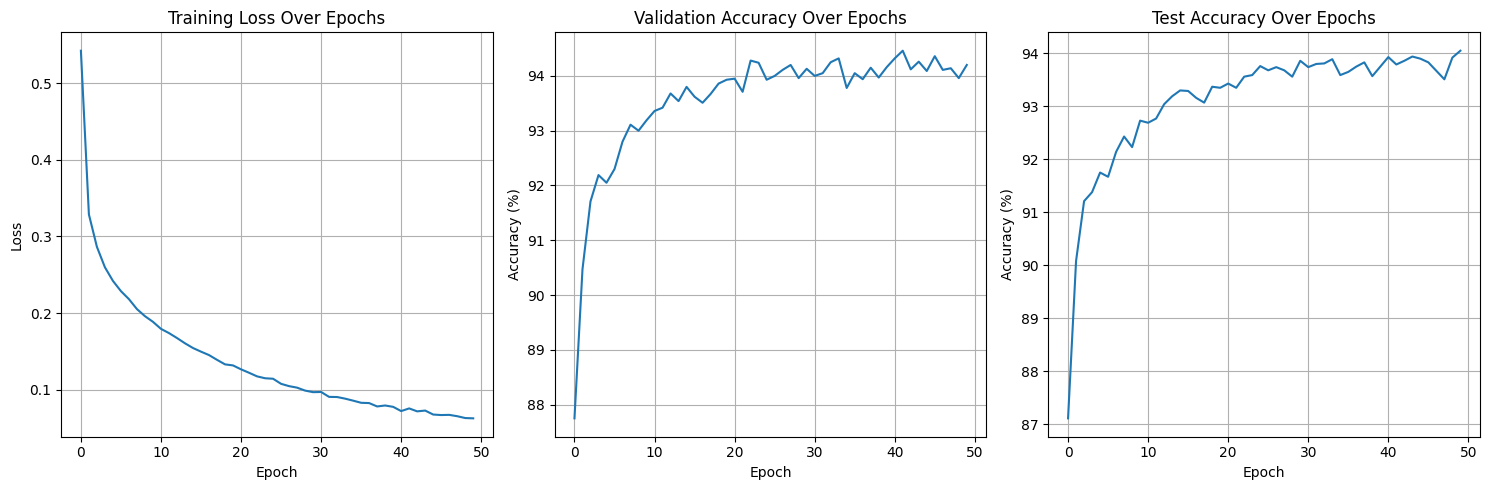

In [12]:
plot_results(train_losses, val_accuracies, test_accuracies)

## Problem 2c)

Write down your response in the final report.